<div style="width: 100%; overflow: hidden; margin: 0;">
    <img 
        src="http://localhost:8888/files/Predictive-Analytics-and-Data-Exploration-Projects/Image/waterfront-cottages-oceanside-california-usa-beachfront-vacation-bungalow-houses-beach-palm-trees_333216-267.jpg?_xsrf=2%7C9c54ae3b%7C9ab2855b2b6038fb12c9e703f7cfa7ab%7C1735691194" 
        alt="Waterfront cottages in Oceanside, California, USA" 
        style="width: 100%; height: auto; object-fit: cover; display: block;">
</div>

# Kaliforniya'da Ev Fiyatları Artık Sır Değil: Veri Bilimi ile Piyasa Analizi Yapın

<h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">Konut Fiyatı Öngörüsü</h2>
<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    Konut fiyatı öngörüsü, emlak pazarında alıcı ve satıcılar için <strong>temel bir karar verme aracı</strong> olarak öne çıkar. Doğru öngörüler, alıcı ve satıcıların piyasa dinamiklerini daha iyi anlamalarına ve rasyonel kararlar almalarına destek olur. Peki, konut fiyatlarını isabetli bir şekilde öngörmek gerçekten mümkün mü? Elbette! <strong>Veri bilimi</strong>, bu karmaşık sürecin yönetiminde güçlü bir araç olarak karşımıza çıkıyor.
</font>

<h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">Veri Biliminin Rolü</h2>
<font size="4"  style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    Veri bilimi, emlak gibi değişken piyasalarda karmaşık veri setlerini analiz ederek karar alıcılar için rehberlik eden bilgiler sağlar. Bireysel deneyimlerin ötesine geçerek:
    <ul>
        <li>📈 Piyasa koşullarını</li>
        <li>💰 Finansal verileri</li>
        <li>👥 Demografik unsurları</li>
    </ul>
    inceleyerek, fiyatlandırma stratejilerinin daha sağlam bir temele oturtulmasına katkıda bulunur. Bu sayede, hem alıcılar hem de satıcılar için <strong>daha şeffaf ve güvenilir bir piyasa ortamı</strong> oluşturulmuş olur.
</font>

<h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">Makine Öğrenimi Modeli</h2>
<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    Bu dokümanda, <strong>Kaliforniya nüfus sayımından elde edilen verilere</strong> dayanarak konut fiyatlarını tahmin etmek için bir makine öğrenimi modeli oluşturmayı amaçlıyoruz. Kullanacağımız veriler, her blok grubundaki nüfus, medyan gelir ve medyan ev fiyatları gibi önemli özellikleri içermektedir. Blok grupları, genellikle 600 ile 3.000 kişi arasında bir nüfusa sahip olan en küçük coğrafi birimlerdir ve bu birimlere "bölge" adı verilmektedir. Nihayetinde, makine öğrenimi modelimiz bu verilerden çıkarımda bulunarak belirli bir mahalledeki medyan ev fiyatını tahmin edebilecektir. Bu da alıcılara, <strong>daha bilinçli ve stratejik kararlar verme fırsatı</strong> sunacaktır.
</font>

<h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">Kaliforniya Konut Fiyatı Tahmin Projesi</h2>
<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Umarım konut fiyatlarını tahmin etme konusundaki problem tanımını anlamışsınızdır. Şimdi, Python ile konut fiyatlarını tahmin etmeye yönelik bir makine öğrenimi projesine başlayacağız. 
İlk olarak, gerekli Python kütüphanelerini ve veri setini yüklemeye başlayalım:
</font>

In [1]:
# Pandas kütüphanesini içe aktar
import pandas as pd

In [2]:
# CSV dosyasını yükle
df = pd.read_csv(r"C:\Users\Samira\Sumeyra\btk-akademi\Predictive-Analytics-and-Data-Exploration-Projects\Datasets\housing.csv")

In [3]:
# Yüklenen verinin ilk 5 satırını görüntüle
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Her bir satır, bir ilçeyi temsil etmektedir ve veri setinde 10 adet özellik bulunmaktadır. Şimdi, veri hakkında hızlı bir tanım almak için <code>info()</code> yöntemini kullanacağız. Bu yöntem, toplam satır sayısını, her bir özelliğin veri tipini ve sıfır olmayan değerlerin sayısını öğrenmek için oldukça faydalıdır:
</font>

In [4]:
# DataFrame'in genel bilgilerini görüntüle
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Veri setinde toplam 20,640 satır bulunduğu ifade ediliyor; ancak <code>total_bedrooms</code> sütununda yalnızca 20,433 geçerli (sıfır olmayan) değer mevcuttur; bu da 207 ilçede değer bulunmadığı anlamına gelir. Ek olarak, veri setindeki sütunlardan yalnızca <code>ocean_proximity</code> sütunu nesne (<code>object</code>) tipindedir; diğer tüm sütunlar sayısal nitelik taşımaktadır. Bu durum, <code>ocean_proximity</code> sütununun kategorik veri içerdiğini ve bu sütundaki her bir benzersiz değerin farklı kategorilere işaret ettiğini gösterir. Bu sütundaki mevcut kategorileri ve her kategoriye ait kaç ilçenin bulunduğunu öğrenmek için <code>value_counts()</code> yöntemini kullanabiliriz.
</font>

In [5]:
# 'ocean_proximity' sütunundaki değerlerin sayısını al
# Bu işlem, farklı konumların (okyanusa yakın veya uzak) ne kadar sıklıkla bulunduğunu gösterir.
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Veri setindeki sayısal özellikler hakkında bir fikir edinmenin bir diğer hızlı yolu, her bir sayısal özellik için bir histogram çizmektir:
</font>

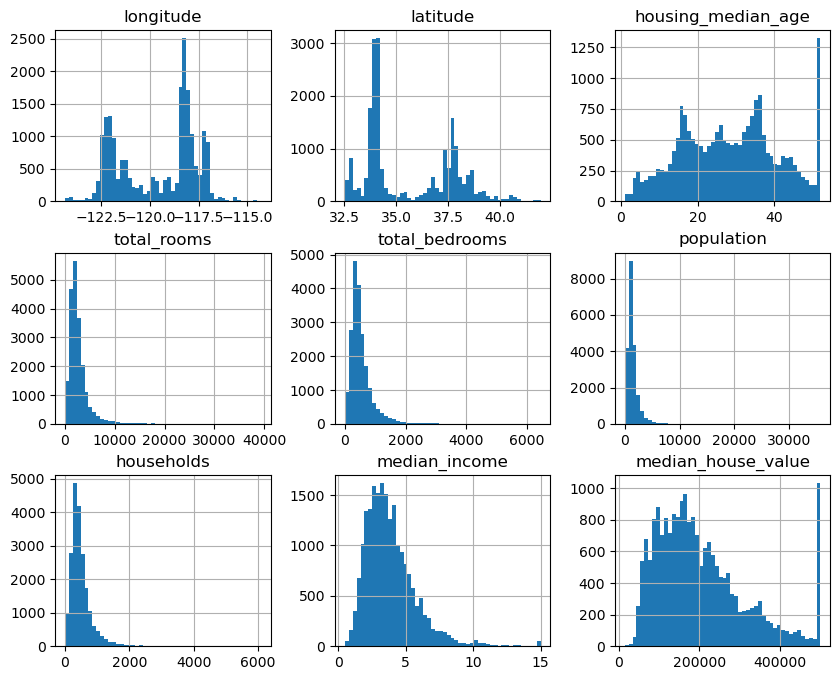

In [6]:
# Sayısal sütunlar için histogramları oluştur
# 'bins=50' ile toplam veriyi 50 parçaya bölerek, her bir parçayı bir çubuk ile temsil etmiş oluruz.
# 'figsize=(10, 8)' ile grafiğin boyutu ayarlanır.
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(10, 8))
plt.show()

<h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">Grafikteki Yoğun Birikmelerin Model Performansına Etkisi</h2>
<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Yukarıdaki grafikte gördüğünüz gibi, <code>median_house_value</code> ve <code>housing_median_age</code> sütunlarında belli değerler etrafında aşırı birikmeler var. Bu durum, modelin bu değerlere aşırı duyarlı olmasına ve diğer değer aralıklarını öğrenememesine neden olabilir. Özellikle:

<ul>
<li><code>median_house_value</code>: 500001.0 değeri 795 kez tekrar ediyor.</li>
<li><code>housing_median_age</code>: 52 yaşında olan konutlar 1273 kez yer alıyor.</li>
</ul>

Bu dengesizlik, modelin genelleme yapmasını zorlaştırabilir ve aşırı uyuma (<em>overfitting</em>) yol açabilir. Bu nedenle, bu iki sütunu veri setinden çıkarmak için <code>drop()</code> metodunu kullanıyoruz:
</font>

In [7]:
# median_house_value sütununda 450,000'den büyük olan konut değerlerini filtrele
high_value_housing = df[df['median_house_value'] > 450000]

# Filtrelenmiş konut değerlerinin sıklığını (value counts) hesapla
value_counts = high_value_housing['median_house_value'].value_counts()

# Sonuçları ekrana yazdır (her bir değer ve sıklığını göster)
print(value_counts)

median_house_value
500001.0    965
500000.0     27
475000.0      8
483300.0      6
466700.0      4
           ... 
498600.0      1
453600.0      1
452300.0      1
481300.0      1
467700.0      1
Name: count, Length: 188, dtype: int64


In [8]:
# median_house_value sütununda 500,000'den büyük olan satırları filtrele
rows_to_drop = df[df['median_house_value'] > 500000].index

# Filtrelenmiş satırları DataFrame'den kaldır
df.drop(index=rows_to_drop, inplace=True)

# Güncellenmiş DataFrame'in boyutunu kontrol et
print(df.shape)

(19675, 10)


In [9]:
# housing_median_age sütununda 50'den büyük olan satırları filtrele
filtered_housing = df[df['housing_median_age'] > 45]

# Filtrelenmiş yaş değerlerinin sıklığını (value counts) hesapla
age_value_counts = filtered_housing['housing_median_age'].value_counts()

# Sonuçları ekrana yazdır
print(age_value_counts)

housing_median_age
52.0    1103
46.0     236
47.0     190
48.0     167
49.0     126
50.0     123
51.0      44
Name: count, dtype: int64


In [10]:
# housing_median_age sütununda 51'den büyük olan satırların indekslerini al
rows_to_drop = df[df['housing_median_age'] > 51].index

# Belirtilen satırları DataFrame'den kaldır
df.drop(index=rows_to_drop, inplace=True)

# Güncellenmiş DataFrame'in boyutunu kontrol et
print(df.shape)

(18572, 10)


<h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">Boş Verilerin Doldurulması</h2>
<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Veri bilimi süreçlerinde, eksik verilerin uygun bir şekilde doldurulması büyük bir önem taşır. Boş veriler, modelin doğruluğunu ve genel performansını olumsuz etkileyebilir; bu nedenle eksik verilerin ele alınması gerekir. Veri setimizdeki önemli özniteliklerden biri olan <code>total_bedrooms</code> sütununda eksik (NaN) değerler bulunmaktadır. Bu boş verilerin yerine daha anlamlı değerler koymak, modelin daha sağlıklı bir şekilde öğrenmesine yardımcı olacaktır. Bu bağlamda, eksik verileri <code>medyan()</code> metodu ile doldurmayı tercih edeceğiz:
</font>

In [11]:
# DataFrame'deki eksik değerlerin sayısını kontrol et
missing_values = df.isna().sum()

# Eksik değerleri göster
print(missing_values)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        193
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [12]:
# total_bedrooms sütunundaki boş değerleri, sütunun medyanı ile doldur
median_bedrooms = df['total_bedrooms'].median()
df.loc[df['total_bedrooms'].isna(), 'total_bedrooms'] = median_bedrooms

# DataFrame'in indeksini sıfırla
df.reset_index(drop=True, inplace=True)

In [13]:
# Eksik verileri doldurduktan sonra, DataFrame'deki boş değerlerin sayısını kontrol et
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<div class="alert alert-block alert-success">
<b>Neden Medyan Kullanmalıyız?</b><br>
Not: <strong>total_bedrooms</strong> sütunundaki boş değerleri medyan ile doldurduk çünkü veri dağılımımız sağa çarpıktır. Medyan, verilerin ortasında yer alan değeri temsil eder ve aşırı uç değerlerden etkilenmez. Bu özellik, sağa çarpık dağılımda daha iyi bir temsil sunar. Bu da verinin genel dağılımını korumaya yardımcı olur ve modelin daha etkili bir şekilde öğrenmesini sağlar. Böylece, eksik değerlerin yerine daha anlamlı bir değer yerleştirilmiş olur.
</div>

<h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">Kategorik Verilerin Sayısal Verilere Dönüştürülmesi</h2>
<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<code>ocean_proximity</code> sütunu, konutların okyanusa olan yakınlık durumunu temsil eden bir kategorik veri sütunudur. Veri bilimi alanında, makine öğrenimi modellerinin etkili bir şekilde çalışabilmesi için kategorik verilerin sayısal verilere dönüştürülmesi büyük önem taşır. Çünkü bu tür veriler, doğrudan sayısal hesaplamalara uygun değildir. Bu nedenle, <code>ocean_proximity</code> sütununu sayısal verilere dönüştürmek amacıyla <code>pd.get_dummies()</code> fonksiyonunu kullandık.
</font>

In [14]:
# 'ocean_proximity' sütunundaki benzersiz değerleri al
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [15]:
import pandas as pd
# Kategorik veriyi sayısal verilere dönüştürme
# drop_first=True argümanı kullanılarak:
##- İlk kategoriyi atlıyoruz, böylece sadece gerekli olan sütunlar oluşturuluyor.
##- Bu yöntem, modelin öğrenme sürecinde gereksiz fazla kolon oluşumunu engelliyor.
##- Aşırı uyum (overfitting) riskini azaltarak modelin genel performansını artırıyor.

df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

df.iloc[:, -4:]

,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
18567,True,False,False,False
18568,True,False,False,False
18569,True,False,False,False
18570,True,False,False,False


<div class="alert alert-block alert-success">
<b>Not:</b> Veri biliminde, kategorik verileri sayısal verilere dönüştürmek için <strong>get_dummies</strong> fonksiyonu kullanılır. Bu yöntem, her kategoriyi ayrı sütunlara ayırarak verinin sayısal hale gelmesini sağlar. Örneğin, <strong>"ocean_proximity"</strong> sütununda denize olan yakınlık kategorileri vardı. <strong>get_dummies</strong> kullanarak bu kategoriler sayısal hale getirildi. Oluşan yeni sütunlar, belirli bir kategorinin varlığını 1 (True) ya da 0 (False) ile gösterir. Bu işlem, makine öğrenmesi algoritmaları için kategorik verileri anlamlı hale getirir.
</div>

<h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">Korelasyon Matrisi ve Median House Value İlişkisi</h2>
<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Veri setindeki belirli bir değişkenin, örneğin <code>median_house_value</code> (medyan konut değeri), diğer değişkenlerle olan ilişkisini keşfetmek için <code>corr()</code> fonksiyonu kullanma:
</font>


In [16]:
# Korelasyon matrisini hesapla
correlation_matrix = df.corr()

# Medyan konut değerinin diğer değişkenlerle olan ilişkisini sıralı bir şekilde al
median_house_value_corr = correlation_matrix['median_house_value'].sort_values(ascending=False)

# Sonuçları görüntüle
print(median_house_value_corr)


median_house_value            1.000000
median_income                 0.661039
total_rooms                   0.152606
ocean_proximity_NEAR OCEAN    0.148544
ocean_proximity_NEAR BAY      0.110896
households                    0.100220
total_bedrooms                0.079146
population                    0.021616
ocean_proximity_ISLAND        0.019409
housing_median_age            0.014772
longitude                    -0.022165
latitude                     -0.172126
ocean_proximity_INLAND       -0.500525
Name: median_house_value, dtype: float64


In [17]:
print(df['median_house_value'].describe())

count     18572.000000
mean     189607.608066
std       95790.237279
min       14999.000000
25%      115400.000000
50%      171200.000000
75%      243225.000000
max      500000.000000
Name: median_house_value, dtype: float64


<h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">Medyan Gelirin Kategorik Değerlere Dönüştürülmesi</h2>
<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
İstatistiksel verileri anlamayı kolaylaştırmak amacıyla, sayısal değerleri kategorik değerlere dönüştürmek oldukça faydalıdır. Bu bağlamda, <code>median_income</code> değişkenini beş gruba ayırarak, farklı gelir seviyelerindeki konutların özelliklerini daha etkili bir şekilde analiz etmeyi hedefliyoruz.
<br><br>
Öncelikle, gelir aralıklarını belirleyerek her bir gruba uygun etiketler vereceğiz. Bu işlem, verilerin yorumlanmasını basit hale getirecek ve analiz sürecini kolaylaştıracaktır. Kategorik dönüşüm için <code>cut()</code> metodunu kullanarak, medyan geliri kategorik bir formata dönüştüreceğiz. Bu sayede verilerimizi daha anlaşılır hale getireceğiz:
</font>

<Axes: >

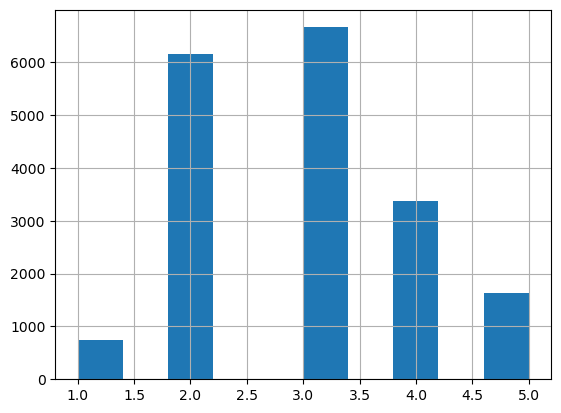

In [18]:
import numpy as np
# Median gelir aralıklarını tanımla
income_bins = [0., 1.5, 3.0, 4.5, 6., np.inf]  # Gelir aralıklarını belirleyen sınırlar
income_labels = [1, 2, 3, 4, 5]  # Her bir aralık için atanacak kategorik etiketler

# Median gelir verilerini kategorik değerlere dönüştür
df['median_income'] = pd.cut(df['median_income'], bins=income_bins, labels=income_labels)

# Oluşturulan kategorik verilerin histogramını çiz
df['median_income'].hist()

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['median_income']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

<h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">Verilerin Eğitim ve Test Setlerine Ayrılması</h2>
<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Verilerimizin eğitim (<code>train</code>) ve test (<code>test</code>) setlerine orantılı ve dengeli bir şekilde ayrılması için <code>StratifiedShuffleSplit</code> yöntemini kullanıyoruz. Bu yöntem, her sınıfın (örneğin, <code>median_income</code>) eğitim ve test setlerinde benzer oranlarda temsil edilmesini sağlar. Böylece modelimizin daha güvenilir sonuçlar vermesine yardımcı olur. Bu sayede, eğitim ve test setleri arasında sınıf dağılımı açısından bir dengesizlik oluşmaz ve modelin genel performansı artar.
<br><br>
<code>Median_income</code>, sunucu üzerinde en çok etkileyen öz niteliklerden biri olduğu için, bu özellik üzerinden yapılan stratifikasyon, modelimizin performansını artıracaktır. Stratifikasyon sayesinde, <code>median_income</code> özelliğinin etkisi göz önünde bulundurularak verilerin ayrılması, modelin daha doğru ve güvenilir sonuçlar üretmesini sağlayacaktır:
</font>

In [20]:
X_train = strat_train_set.drop('median_house_value', axis=1)
y_train = strat_train_set['median_house_value']

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value']

X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [21]:
import pandas as pd
import numpy as np
import time
import warnings
import logging
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

In [22]:
# Configuration
warnings.filterwarnings("ignore")
logging.basicConfig(level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')

def scale_data(X_train, X_test):
    """Scale the features using StandardScaler"""
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

def initialize_models():
    """Initialize and return a dictionary of regression models with optimized universal settings.
    All models are configured to handle most datasets without additional tuning.
    """
    
    # Common preprocessing for linear models and neural networks
    linear_preprocessing = make_pipeline(
        SimpleImputer(strategy='median'),  # Handle missing values
        RobustScaler()  # Better for outliers than StandardScaler
    )
    
    # Common tree-based preprocessing (no scaling needed)
    tree_preprocessing = make_pipeline(
        SimpleImputer(strategy='median')
    )
    
    return {
        # Linear Models (with scaling)
        'Linear Regression': make_pipeline(
            linear_preprocessing,
            LinearRegression()
        ),
        'Ridge Regression': make_pipeline(
            linear_preprocessing,
            Ridge(alpha=1.0, random_state=42)
        ),
        'Lasso Regression': make_pipeline(
            linear_preprocessing,
            Lasso(alpha=0.01, random_state=42)  # More aggressive regularization
        ),
        'Elastic Net': make_pipeline(
            linear_preprocessing,
            ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)
        ),
        'SGD Regressor': make_pipeline(
            linear_preprocessing,
            SGDRegressor(
                max_iter=1000,
                tol=1e-3,
                penalty='elasticnet',  # Combines L1+L2
                alpha=0.001,
                l1_ratio=0.15,
                random_state=42,
                early_stopping=True
            )
        ),
        
        # Tree-Based Models
        'Random Forest': RandomForestRegressor(
            n_estimators=200,
            max_depth=None,
            min_samples_split=5,
            min_samples_leaf=2,
            max_features='sqrt', 
            bootstrap=True,
            random_state=42,
            n_jobs=-1
        ),
        'Decision Tree': DecisionTreeRegressor(
            max_depth=None,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42
        ),
        'Extra Trees': ExtraTreesRegressor(
            n_estimators=200,
            max_depth=None,
            min_samples_split=5,
            random_state=42,
            n_jobs=-1
        ),
        
        # Boosting Models
        'XGBoost': XGBRegressor(
            n_estimators=300,
            learning_rate=0.1,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            gamma=0.1,
            reg_alpha=0.1,
            reg_lambda=1.0,
            random_state=42,
            early_stopping_rounds=None,
            eval_metric='rmse',
            n_jobs=-1
        ),
        'Gradient Boosting': GradientBoostingRegressor(
            n_estimators=200,
            learning_rate=0.1,
            max_depth=5,
            min_samples_split=5,
            random_state=42
        ),
        'LightGBM': LGBMRegressor(
            n_estimators=200,
            learning_rate=0.1,
            max_depth=-1,  # No limit
            num_leaves=31,
            min_child_samples=5,
            random_state=42,
            n_jobs=-1
        ),
        'AdaBoost': AdaBoostRegressor(
            estimator=DecisionTreeRegressor(
            max_depth=3,
            min_samples_split=5,
            random_state=42
            ),
            n_estimators=200,
            learning_rate=0.1,
            loss='linear',
            random_state=42
        ),
        
        # Other Models
        'SVR': make_pipeline(
           # Ön işleme
            SimpleImputer(strategy='median'),  # Eksik değerler için
            RobustScaler(),  # Aykırı değerlere dayanıklı ölçeklendirme
            
            # Optimize SVR modeli
            SVR(
                kernel='rbf',  # Non-lineer ilişkiler için
                C=10.0,       # Regularization parametresi (geniş aralık)
                epsilon=0.1,  # Hata toleransı
                gamma='auto', # Kernel katsayısı (otomatik ayar)
                cache_size=1000,  # Büyük veriler için
                max_iter=-1   # Tüm iterasyonlara izin ver
            )
        ),
        'K-Nearest Neighbors': make_pipeline(
           # Robust preprocessing
            SimpleImputer(strategy='median'),  # Handle missing values
            RobustScaler(),  # Better for outliers than StandardScaler
            
            # Optimized KNN model
            KNeighborsRegressor(
                n_neighbors=7,  # Optimal starting point (odd number)
                weights='distance',  # Weight by inverse distance
                p=1,  # Manhattan distance (more robust to outliers)
                algorithm='auto',  # Automatic algorithm selection
                leaf_size=30,  # Balanced tree performance
                n_jobs=-1  # Use all CPU cores
            )
        ),
        'MLP Regressor': make_pipeline(
            # 1. ADIM: GELİŞMİŞ VERİ ÖN İŞLEME
            SimpleImputer(strategy='median'),  # Eksik değerleri medyanla doldur
            PowerTransformer(method='yeo-johnson'),  # Dağılımı normalize et
            RobustScaler(),  # Aykırı değerlere dayanıklı ölçeklendirme
            PCA(n_components=0.95),  # Boyut azaltma (opsiyonel)
            
            # 2. ADIM: OPTİMİZE MLP MODELİ

            MLPRegressor(
                hidden_layer_sizes=(100, 50),
                activation='relu',
                solver='adam',
                alpha=0.0001,
                batch_size=256,
                learning_rate='adaptive',
                early_stopping=True,
                random_state=42,
                max_iter=1000  
            )
        )
    }

def evaluate_model(model, X_train, y_train, X_test, y_test):
    """Evaluate a model and return performance metrics"""
    start_time = time.time()
    
    try:
        logging.info(f"Training {model.__class__.__name__}...")
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, 
                                   cv=5, scoring='neg_mean_squared_error')
        cv_rmse = np.sqrt(-cv_scores)
        
        elapsed_time = time.time() - start_time
        
        return {
            'Model': model.__class__.__name__,
            'RMSE': round(rmse, 3),
            'R2 Score': round(r2, 3),
            'CV RMSE (Mean)': round(cv_rmse.mean(), 3),
            'CV RMSE (Std)': round(cv_rmse.std(), 3),
            'Time (s)': round(elapsed_time, 2)
        }
        
    except Exception as e:
        logging.error(f"Error with {model.__class__.__name__}: {str(e)}")
        return None

def main(X_train, X_test, y_train, y_test):
    """Main function to run the model evaluation pipeline"""
    # Scale the data
    X_train_scaled, X_test_scaled = scale_data(X_train, X_test)
    
    # Initialize models
    models = initialize_models()
    
    # Evaluate models
    results = []
    for name, model in models.items():
        metrics = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
        if metrics:
            metrics['Model'] = name  # Use the dictionary key as model name
            results.append(metrics)
    
    # Create and return results dataframe
    results_df = pd.DataFrame(results).sort_values(by='RMSE')
    results_df.reset_index(drop=True, inplace=True)
    return results_df

In [23]:
results = main(X_train, X_test, y_train, y_test)
results

2025-04-11 03:20:28,428 - INFO - Training Pipeline...
2025-04-11 03:20:28,817 - INFO - Training Pipeline...
2025-04-11 03:20:29,168 - INFO - Training Pipeline...
2025-04-11 03:20:30,615 - INFO - Training Pipeline...
2025-04-11 03:20:32,024 - INFO - Training Pipeline...
2025-04-11 03:20:32,510 - INFO - Training RandomForestRegressor...
2025-04-11 03:20:42,309 - INFO - Training DecisionTreeRegressor...
2025-04-11 03:20:43,720 - INFO - Training ExtraTreesRegressor...
2025-04-11 03:20:53,415 - INFO - Training XGBRegressor...
2025-04-11 03:21:00,667 - INFO - Training GradientBoostingRegressor...
2025-04-11 03:22:28,512 - INFO - Training LGBMRegressor...


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1597
[LightGBM] [Info] Number of data points in the train set: 14857, number of used features: 11
[LightGBM] [Info] Start training from score 189616.954769
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000871 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1596
[LightGBM] [Info] Number of data points in the train set: 11885, number of used features: 11
[LightGBM] [Info] Start training from score 189618.729239
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000930 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1597
[LightGBM] [Info] Number of data points in the train set: 11885, number of used features: 11
[LightGBM] [Info]

2025-04-11 03:22:39,072 - INFO - Training AdaBoostRegressor...
2025-04-11 03:23:31,373 - INFO - Training Pipeline...
2025-04-11 03:25:47,290 - INFO - Training Pipeline...
2025-04-11 03:25:52,690 - INFO - Training Pipeline...


,Model,RMSE,R2 Score,CV RMSE (Mean),CV RMSE (Std),Time (s)
0,XGBoost,4.184339e+04,8.100000e-01,4.322040e+04,7.058860e+02,7.25
1,LightGBM,4.223081e+04,8.060000e-01,4.328069e+04,7.445790e+02,10.56
2,Gradient Boosting,4.318861e+04,7.970000e-01,4.474020e+04,8.610570e+02,87.85
3,Extra Trees,4.481647e+04,7.820000e-01,4.648676e+04,7.381450e+02,9.69
4,Random Forest,4.597555e+04,7.700000e-01,4.719479e+04,6.223470e+02,9.80
5,K-Nearest Neighbors,5.410706e+04,6.820000e-01,5.533738e+04,1.089370e+03,5.40
6,Decision Tree,5.696268e+04,6.470000e-01,5.876345e+04,1.527612e+03,1.41
7,Ridge Regression,6.266251e+04,5.730000e-01,6.189882e+04,1.032609e+03,0.35
8,Lasso Regression,6.266334e+04,5.730000e-01,6.189884e+04,1.031525e+03,1.45
9,Linear Regression,6.266335e+04,5.730000e-01,6.189884e+04,1.031524e+03,0.39


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
import warnings
import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import optuna
from optuna.logging import set_verbosity, WARNING

# İlgili regresyon modellerini import ediyoruz
from sklearn.ensemble import (
    AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
)
from sklearn.linear_model import (
    ElasticNet, SGDRegressor, LinearRegression, Ridge, Lasso
)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
import lightgbm as lgbm
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
# Uyarıları bastıralım
warnings.filterwarnings("ignore")

def find_best_model_params(X_train, X_test, y_train, y_test, results=None):
    
    # 2. En iyi modeli seçme (results'ın ilk satırı)
    print("🔍 En iyi model seçiliyor...")
    if results is None:
        # results DataFrame'i verilmemişse, örnek olarak RandomForest kullanılır
        best_model_name = "Random Forest"
        print(f"⚠️ Uyarı: results DataFrame'i bulunamadı. Varsayılan olarak '{best_model_name}' kullanılacak.")
    else:
        # results DataFrame'inden en düşük RMSE'ye sahip modeli seçiyoruz
        # Burada index değeri olarak model adını alıyoruz
        best_model_name = str(results.iloc[0]['Model'])  # String'e dönüştürüyoruz
        print(f"✅ En düşük RMSE skoru ile '{best_model_name}' modeli seçildi!")
    
    # 3. Model sınıfını belirleme
    print(f"🧪 '{best_model_name}' modeli için hiperparametre optimizasyonu başlatılıyor...")
    
    # Optuna çalışması için model oluşturma fonksiyonu
    def create_model_for_optuna(model_name):
        # String kontrolü yapalım, model adı string değilse dönüştürelim
        model_name = str(model_name)
        
        if "AdaBoost" in model_name:
            return optimize_adaboost
        elif "ElasticNet" in model_name:
            return optimize_elasticnet
        elif "SGD" in model_name:
            return optimize_sgd
        elif "LightGBM" in model_name or "LGBM" in model_name:
            return optimize_lightgbm
        elif "XGBoost" in model_name or "XGB" in model_name:
            return optimize_xgboost
        elif "Random Forest" in model_name:
            return optimize_random_forest
        elif "Gradient Boosting" in model_name:
            return optimize_gradient_boosting
        elif "SVR" in model_name:
            return optimize_svr
        elif "KNN" in model_name:
            return optimize_knn
        elif "MLP Regressor" in model_name:
            return optimize_mlp
        elif "Linear Regression" in model_name:
            return optimize_linear
        elif "Ridge" in model_name:
            return optimize_ridge
        elif "Lasso" in model_name:
            return optimize_lasso
        elif "Gaussian Process" in model_name:
            return optimize_gaussian_process
        else:
            print(f"❌ Uyarı: '{model_name}' için optimize fonksiyonu bulunamadı. RandomForest kullanılacak.")
            return optimize_random_forest
    
    # 4. Optuna için optimize fonksiyonlarını tanımlama
    def optimize_adaboost(trial):
        n_estimators = trial.suggest_int('n_estimators', 50, 500)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0, log=True)
        loss = trial.suggest_categorical('loss', ['linear', 'square', 'exponential'])
        
        model = AdaBoostRegressor(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            loss=loss,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_elasticnet(trial):
        alpha = trial.suggest_float('alpha', 1e-5, 1.0, log=True)
        l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)
        max_iter = trial.suggest_int('max_iter', 500, 2000)
        
        model = ElasticNet(
            alpha=alpha,
            l1_ratio=l1_ratio,
            max_iter=max_iter,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_sgd(trial):
        loss = trial.suggest_categorical('loss', ['squared_error', 'huber', 'epsilon_insensitive'])
        penalty = trial.suggest_categorical('penalty', ['l2', 'l1', 'elasticnet'])
        alpha = trial.suggest_float('alpha', 1e-6, 1e-1, log=True)
        max_iter = trial.suggest_int('max_iter', 500, 5000)
        
        model = SGDRegressor(
            loss=loss,
            penalty=penalty,
            alpha=alpha,
            max_iter=max_iter,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_lightgbm(trial):
        num_leaves = trial.suggest_int('num_leaves', 20, 150)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        min_child_samples = trial.suggest_int('min_child_samples', 5, 30)
        subsample = trial.suggest_float('subsample', 0.5, 1.0)
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
        
        model = lgbm.LGBMRegressor(
            num_leaves=num_leaves,
            learning_rate=learning_rate,
            n_estimators=n_estimators,
            min_child_samples=min_child_samples,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_xgboost(trial):
        max_depth = trial.suggest_int('max_depth', 3, 10)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        subsample = trial.suggest_float('subsample', 0.5, 1.0)
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
        gamma = trial.suggest_float('gamma', 0, 5)
        
        model = xgb.XGBRegressor(
            max_depth=max_depth,
            learning_rate=learning_rate,
            n_estimators=n_estimators,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            gamma=gamma,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_random_forest(trial):
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        max_depth = trial.suggest_int('max_depth', 5, 30, step=5)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
        max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
        
        model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_gradient_boosting(trial):
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
        max_depth = trial.suggest_int('max_depth', 3, 10)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
        subsample = trial.suggest_float('subsample', 0.5, 1.0)
        
        model = GradientBoostingRegressor(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            subsample=subsample,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_svr(trial):
        C = trial.suggest_float('C', 1e-2, 1e2, log=True)
        epsilon = trial.suggest_float('epsilon', 1e-3, 1.0, log=True)
        gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
        kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
        
        model = SVR(
            C=C,
            epsilon=epsilon,
            gamma=gamma,
            kernel=kernel
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_knn(trial):
        n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
        weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
        algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
        p = trial.suggest_int('p', 1, 2)  # Manhattan veya Euclidean mesafesi
        
        model = KNeighborsRegressor(
            n_neighbors=n_neighbors,
            weights=weights,
            algorithm=algorithm,
            p=p
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_mlp(trial):
        hidden_layer_1 = trial.suggest_int('hidden_layer_1', 50, 200, step=10)
        hidden_layer_2 = trial.suggest_int('hidden_layer_2', 20, hidden_layer_1)
        activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
        alpha = trial.suggest_float('alpha', 1e-6, 1e-2, log=True)
        learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
        
        model = MLPRegressor(
            hidden_layer_sizes=(hidden_layer_1, hidden_layer_2),
            activation=activation,
            alpha=alpha,
            learning_rate_init=learning_rate,
            max_iter=500,
            early_stopping=True,
            n_iter_no_change=15,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_linear(trial):
        fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
        
        model = LinearRegression(
            fit_intercept=fit_intercept
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_ridge(trial):
        alpha = trial.suggest_float('alpha', 1e-3, 10.0, log=True)
        solver = trial.suggest_categorical('solver', ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'])
        
        model = Ridge(
            alpha=alpha,
            solver=solver,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_lasso(trial):
        alpha = trial.suggest_float('alpha', 1e-5, 1.0, log=True)
        selection = trial.suggest_categorical('selection', ['cyclic', 'random'])
        max_iter = trial.suggest_int('max_iter', 500, 2000)
        
        model = Lasso(
            alpha=alpha,
            selection=selection,
            max_iter=max_iter,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_gaussian_process(trial):
        alpha = trial.suggest_float('alpha', 1e-10, 1.0, log=True)
        
        model = GaussianProcessRegressor(
            alpha=alpha,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    # 5. Optuna ile hiperparametre optimizasyonu yapma
    print("⚙️ Optuna çalışması başlatılıyor (n_trials=50)...")
    set_verbosity(WARNING)
    
    optimize_func = create_model_for_optuna(best_model_name)
    study = optuna.create_study(direction="minimize")
    study.optimize(optimize_func, n_trials=50)
    
    # 6. En iyi hiperparametrelerle modeli eğitme ve RMSE hesaplama
    best_params = study.best_params
    best_model_class = None
    
    # String kontrol edelim ve gerekirse dönüştürelim
    best_model_name = str(best_model_name)

    # Modeli oluşturma
    if "AdaBoost" in best_model_name:
        best_model_class = AdaBoostRegressor(
            n_estimators=best_params.get('n_estimators', 100),
            learning_rate=best_params.get('learning_rate', 0.1),
            loss=best_params.get('loss', 'linear'),
            random_state=42
        )
    elif "ElasticNet" in best_model_name:
        best_model_class = ElasticNet(
            alpha=best_params.get('alpha', 0.1),
            l1_ratio=best_params.get('l1_ratio', 0.5),
            max_iter=best_params.get('max_iter', 1000),
            random_state=42
        )
    elif "SGD" in best_model_name:
        best_model_class = SGDRegressor(
            loss=best_params.get('loss', 'squared_error'),
            penalty=best_params.get('penalty', 'l2'),
            alpha=best_params.get('alpha', 0.0001),
            max_iter=best_params.get('max_iter', 1000),
            random_state=42
        )
    elif "LightGBM" in best_model_name or "LGBM" in best_model_name:
        best_model_class = lgbm.LGBMRegressor(
            num_leaves=best_params.get('num_leaves', 31),
            learning_rate=best_params.get('learning_rate', 0.1),
            n_estimators=best_params.get('n_estimators', 100),
            min_child_samples=best_params.get('min_child_samples', 20),
            subsample=best_params.get('subsample', 1.0),
            colsample_bytree=best_params.get('colsample_bytree', 1.0),
            random_state=42
        )
    elif "XGBoost" in best_model_name or "XGB" in best_model_name:
        best_model_class = xgb.XGBRegressor(
            max_depth=best_params.get('max_depth', 6),
            learning_rate=best_params.get('learning_rate', 0.1),
            n_estimators=best_params.get('n_estimators', 100),
            subsample=best_params.get('subsample', 1.0),
            colsample_bytree=best_params.get('colsample_bytree', 1.0),
            gamma=best_params.get('gamma', 0),
            random_state=42
        )
    elif "Random Forest" in best_model_name:
        best_model_class = RandomForestRegressor(
            n_estimators=best_params.get('n_estimators', 100),
            max_depth=best_params.get('max_depth', None),
            min_samples_split=best_params.get('min_samples_split', 2),
            min_samples_leaf=best_params.get('min_samples_leaf', 1),
            max_features=best_params.get('max_features', 'sqrt'),
            random_state=42
        )
    elif "Gradient Boosting" in best_model_name:
        best_model_class = GradientBoostingRegressor(
            n_estimators=best_params.get('n_estimators', 100),
            learning_rate=best_params.get('learning_rate', 0.1),
            max_depth=best_params.get('max_depth', 3),
            min_samples_split=best_params.get('min_samples_split', 2),
            min_samples_leaf=best_params.get('min_samples_leaf', 1),
            subsample=best_params.get('subsample', 1.0),
            random_state=42
        )
    elif "SVR" in best_model_name:
        best_model_class = SVR(
            C=best_params.get('C', 1.0),
            epsilon=best_params.get('epsilon', 0.1),
            gamma=best_params.get('gamma', 'scale'),
            kernel=best_params.get('kernel', 'rbf')
        )
    elif "KNN" in best_model_name:
        best_model_class = KNeighborsRegressor(
            n_neighbors=best_params.get('n_neighbors', 5),
            weights=best_params.get('weights', 'uniform'),
            algorithm=best_params.get('algorithm', 'auto'),
            p=best_params.get('p', 2)
        )
    elif "MLP Regressor" in best_model_name:
        best_model_class = MLPRegressor(
            hidden_layer_sizes=(best_params['hidden_layer_1'], best_params['hidden_layer_2']),
            activation=best_params['activation'],
            alpha=best_params['alpha'],
            learning_rate_init=best_params.get('learning_rate', 0.001),  # Default eklenmiş
            max_iter=1000,
            early_stopping=True,
            n_iter_no_change=20,
            random_state=42
        )
    elif "Linear Regression" in best_model_name:
        best_model_class = LinearRegression(
            fit_intercept=best_params.get('fit_intercept', True)
        )
    elif "Ridge" in best_model_name:
        best_model_class = Ridge(
            alpha=best_params.get('alpha', 1.0),
            solver=best_params.get('solver', 'auto'),
            random_state=42
        )
    elif "Lasso" in best_model_name:
        best_model_class = Lasso(
            alpha=best_params.get('alpha', 0.1),
            selection=best_params.get('selection', 'cyclic'),
            max_iter=best_params.get('max_iter', 1000),
            random_state=42
        )
    elif "Gaussian Process" in best_model_name:
        best_model_class = GaussianProcessRegressor(
            alpha=best_params.get('alpha', 1e-10),
            random_state=42
        )
    
    # Modeli eğitme ve değerlendirme
    best_model_class.fit(X_train_scaled, y_train)
    y_pred = best_model_class.predict(X_test_scaled)
    best_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # 7. Sonuçları yazdırma
    print("\n" + "="*50)
    print("📊 OPTİMİZASYON SONUÇLARI 📊")
    print("="*50)
    print(f"🧠 En iyi model: {best_model_name}")
    print(f"📉 En düşük RMSE: {best_rmse:.6f}")
    print("\n🔧 En iyi hiperparametreler:")
    for param, value in best_params.items():
        print(f"   - {param}: {value}")
    print("="*50)
    
    # 8. Sonuçları döndürme
    return {
        "best_model_name": best_model_name,
        "best_model": best_model_class,
        "best_params": best_params,
        "best_rmse": best_rmse
    }

In [26]:
# Hiperparametre optimizasyonunu gerçekleştir
best_params_info = find_best_model_params(X_train, X_test, y_train, y_test, results)
    
    # En iyi parametreleri kullanarak modeli oluştur ve tahmin yap
print("\nEn iyi parametreli model ile tahmin yapılıyor...")
best_model = best_params_info["best_model"]
y_pred = best_model.predict(scaler.transform(X_test))
    
print(f"Test setindeki RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.6f}")
print(f"En iyi parametreler: {best_params_info['best_params']}")

🔍 En iyi model seçiliyor...
✅ En düşük RMSE skoru ile 'XGBoost' modeli seçildi!
🧪 'XGBoost' modeli için hiperparametre optimizasyonu başlatılıyor...
⚙️ Optuna çalışması başlatılıyor (n_trials=50)...

📊 OPTİMİZASYON SONUÇLARI 📊
🧠 En iyi model: XGBoost
📉 En düşük RMSE: 40868.529767

🔧 En iyi hiperparametreler:
   - max_depth: 9
   - learning_rate: 0.04920451311942279
   - n_estimators: 244
   - subsample: 0.9528123451105128
   - colsample_bytree: 0.6334585778103162
   - gamma: 2.8112066041525563

En iyi parametreli model ile tahmin yapılıyor...
Test setindeki RMSE: 40868.529767
En iyi parametreler: {'max_depth': 9, 'learning_rate': 0.04920451311942279, 'n_estimators': 244, 'subsample': 0.9528123451105128, 'colsample_bytree': 0.6334585778103162, 'gamma': 2.8112066041525563}
